# Plotting and Visualization

In [ ]:
%matplotlib notebook

## A Brief matplotlib API Primer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#在jupyter notebook中运行%matplotlib notebook或在IPython中运行%matplotlib
import numpy as np
data = np.arange(10)
data

In [ ]:
plt.plot(data)

### Figure Subplot

In [ ]:
#matplotlib的图像都位于Figure对象中，可以用plt.figure创建一个新的Figure
fig = plt.figure()

In [ ]:
#不能通过空Figure绘图，必须用add_subplot创建一个或多个subplot才行
ax1 = fig.add_subplot(2,2,1)
#图像是2 ✖️ 2的，且当前选中的是4个subplot中的第一个(编号从1开始)
#如果再把后面两个subplot也创建出来
ax2 = fig.add_subplot(2,2,2)

In [ ]:
ax3 = fig.add_subplot(2,2,3)

In [ ]:
plt.plot(np.random.randn(50).cumsum(),'k--')
#matplotlib会在最后一个用过的subplot上进行绘制（如果没有则创建一个subplot）
#'k--' 表示黑色（black）虚线图

In [ ]:
#fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例可以对其它空着的格子画图了
_ = ax1.hist(np.random.randn(100),bins=20,color='k', alpha=0.3)
#alpha参数是指图像的透明度

In [ ]:
#ax1.clear()

In [ ]:
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))

In [ ]:
#matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的figure
#并返回一个含有已创建的subplot对象的numpy数组
fig,axes = plt.subplots(2,3)

In [ ]:
axes

In [ ]:
fig

In [ ]:
#可以对axes进行索引
axes[0,1]

In [ ]:
#plt.subplots(nrows,ncols,sharex,sharey)参数有sharex,sharey
#sharex使所有的subplot有相同的x轴刻度

### Adjusting the spacing around subplots

In [ ]:
#matplotlib会在subplot外围留下一定的边距，并在subplot之间留下间距
#subplots_adjust可以修改间距
#plt.subplots_adjust 是个顶级函数

In [ ]:
#subplots_adjust(left=None, bottom=None, right=None, top=None,
#                wspace=None, hspace=None)
#wspace用于控制subplot之间的宽度，hspace用于控制subplot之间的高度

In [ ]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k', alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

### 颜色，标记，线性

In [ ]:
#plot函数接受一组X和Y坐标，还接受表示颜色和线性的字符串缩写
#ax.plot(x,y,'g--')  g:green
#'g--'是在一个字符串中同时指定颜色和线性
#ax.plot(x,y,linestyle='--',color='g')  分别指定

In [ ]:
plt.plot?

In [ ]:
#线图可以使用标记来强调数据点，标记类型和线性必须放在颜色后面
%matplotlib inline
plt.plot(np.random.randn(30).cumsum(),'ko--')
#'ko--'  k:black o:用o标记强调数据  --：线性

In [ ]:
plt.plot(np.random.randn(30).cumsum(),color='k',linestyle='dashed',marker='o')
#dashed虚线

In [ ]:
#在线性图中，非实际数据点是按线性方式插值的，可以通过drawstyle参数修改
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k--',drawstyle='steps-post',label='steps-post')
#调用legend来创建图例
plt.legend(loc='best')

### 刻度，标签和图例

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

In [ ]:
ax = fig.add_subplot(1,1,1)

In [ ]:
import numpy as np
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
#要改变x轴刻度，使用set_xticks和set_xticklabels
#set_xticks告诉matplotlib刻度放在数据范围内中的哪些位置
#默认下，这些位置也是刻度标签的，但可以通过set_xticklabels将其他内容作为标签
ticks = ax.set_xticks([0,250,500,750,1000])

In [ ]:
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
#rotation为x刻度标签倾斜30度，fontsize字体为small

In [ ]:
ax.set_title('My first matplotlib plot')

In [ ]:
#为x轴设置一个名称
ax.set_xlabel('Stage')

In [ ]:
#对于轴的类有集合方法，可以批量设定绘图选项
props = {
    'yticks':[-30,-20,-10,0,10,20,30],
    'ylabel':'Value',
    'title':'My First Matplotlib Plot'    
}
ax.set(**props)

### Adding legends

In [ ]:
#图例添加的方式有很多种，最简单的方式是在plot的时候传入label参数
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')

In [ ]:
#在plot中添加label参数之后，可以调用ax.legend()或plt.legend()来创建图例
ax.legend(loc='best')

In [ ]:
ax.legend?

In [ ]:
#增加图例，也可以单独增加label
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(np.random.randn(1000).cumsum(),'k')
line2, = ax.plot(np.random.randn(1000).cumsum(),'k--')
line3, = ax.plot(np.random.randn(1000).cumsum(),'k.')
line1.set_label('one')
line2.set_label('two')
line3.set_label('three')
ax.legend()

In [ ]:
#如果要去除label,则传入label='nolegend'

### Annotations and Drawing on a Subplot

In [ ]:
#注解和文字可以通过text，arrow和annotate函数进行
#text可以将文本绘制在指定坐标(x,y)
#ax.text(x,y,'Hello world',family='monospace',fontsize=10)
#注解中既可以有文本，也可以有箭头

In [1]:
import pandas as pd
data = pd.read_csv('examples/spx.csv',index_col=0, parse_dates=True)
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
1990-02-08     332.96
1990-02-09     333.62
1990-02-12     330.08
1990-02-13     331.02
1990-02-14     332.01
1990-02-15     334.89
1990-02-16     332.72
1990-02-20     327.99
1990-02-21     327.67
1990-02-22     325.70
1990-02-23     324.15
1990-02-26     328.67
1990-02-27     330.26
1990-02-28     331.89
1990-03-01     332.74
1990-03-02     335.54
1990-03-05     333.74
1990-03-06     337.93
1990-03-07     336.95
1990-03-08     340.27
1990-03-09     337.93
1990-03-12     338.67
1990-03-13     336.00
1990-03-14     336.87
1990-03-15     338.07
               ...   
2011-09-02    1173.97
2011-09-06    1165.24
2011-09-07    1198.62
2011-09-08    1185.90
2011-09-09    1154.23
2011-09-12    1162.27
2011-09-13    1172.87
2011-09-14    1188.68
2011-09-15    1209.11
2011-09-16    1216.01
2011-09-19    1204.09
2011-09-20    1202.09
2011-09-21    1166.76
2011-09-22    1129.56
2011-09-23

<IPython.core.display.Javascript object>


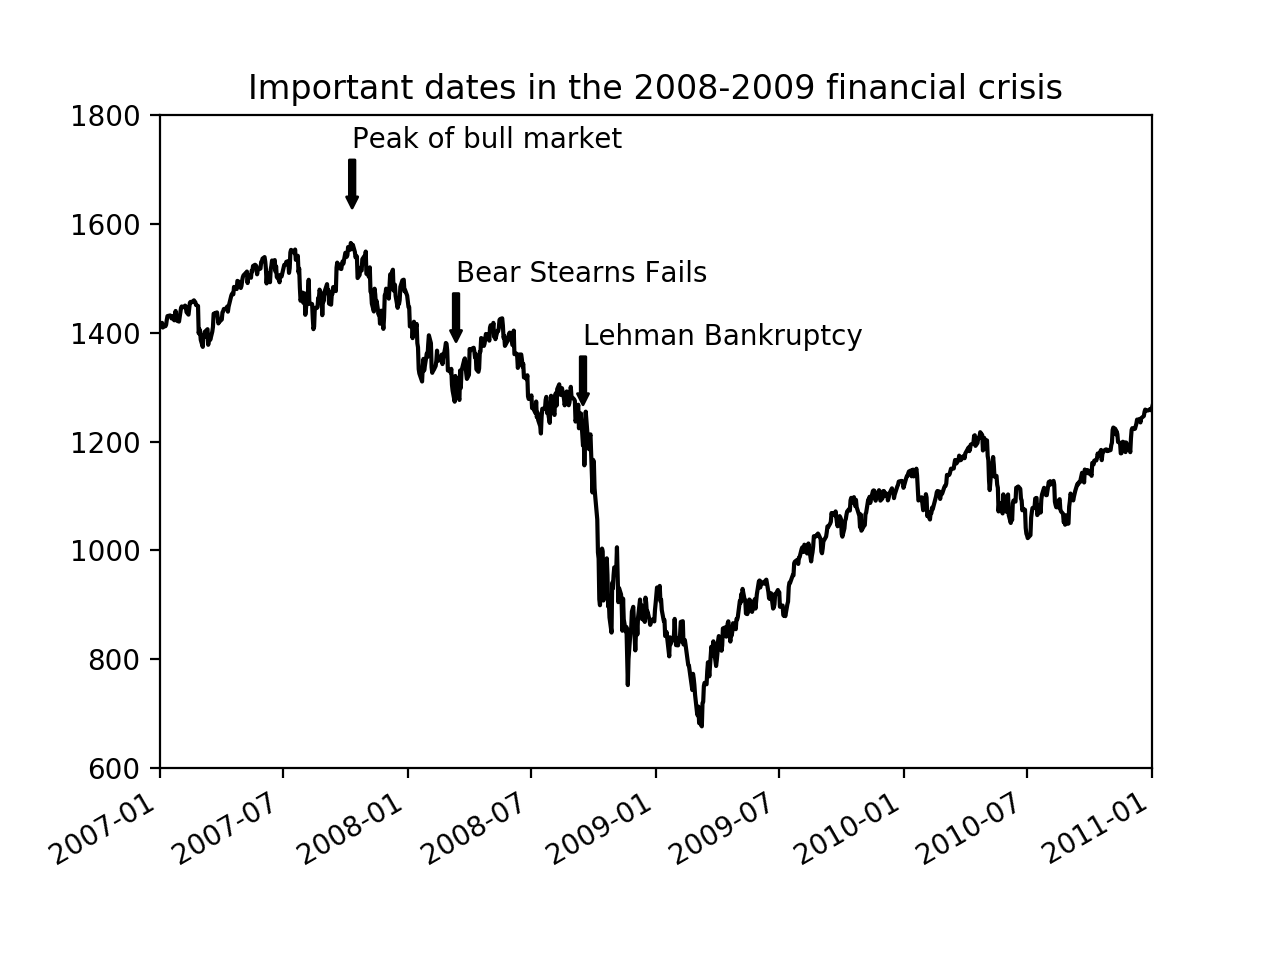

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [20]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('examples/spx.csv',index_col=0, parse_dates=True)
spx = data['SPX']
#注意这里是series.plot()
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
#由参数xy表示的标注位置和xytext的文本位置
#xy=(横坐标，纵坐标)  箭头尖端
#    xytext=(横坐标，纵坐标) 文字的坐标，指的是最左边的坐标
#箭头方向是自然而然从xytext到xy
for date, label in crisis_data:   #annotate注释
    ax.annotate(label,xy=(date,spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# #Zoom in on 2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

In [6]:
datetime(2007,10,11)

datetime.datetime(2007, 10, 11, 0, 0)

In [7]:
spx['2007-10-11']

1554.41

In [21]:
#fig.clear()

<IPython.core.display.Javascript object>


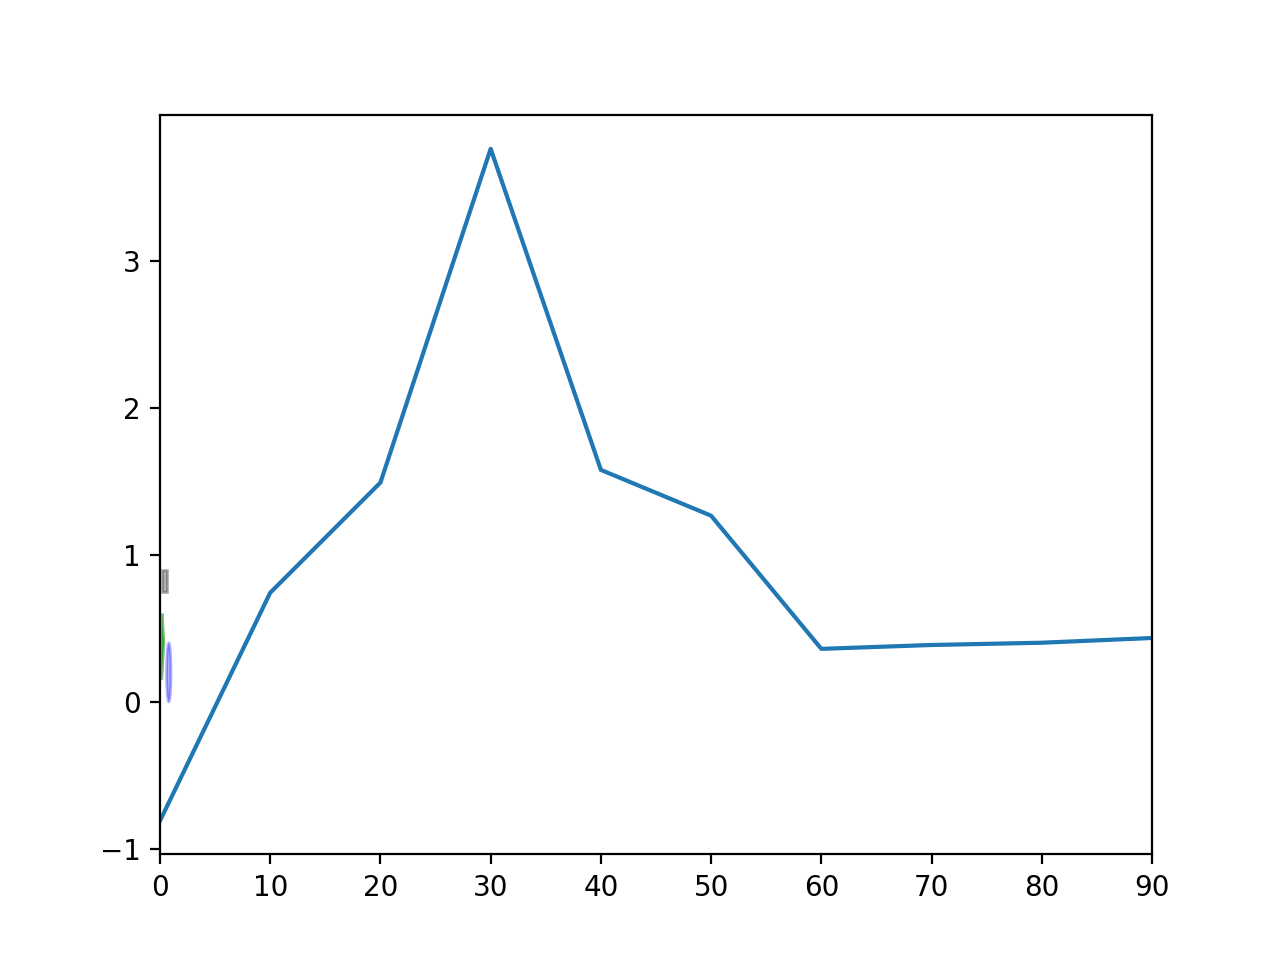

In [25]:
#matplotlib有一些常见图形的对象，这些对象被成为块（patch），例如Rectangle,Circle
#可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches
#要创建一个图形，需要创建一个块对象shp,然后通过ax.add_patch(shp)添加到subplot中
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.8, 0.2), 0.15, color='b', alpha=0.3)
#polygon多边形
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图标保存到文件

In [28]:
#可以用plt.savefig将图标保存到文件，相当于figure对象的实例方法savefig
#plt.savefig('haha.svg')
#fig.savefig('jj.svg')

In [30]:
import os
os.remove('haha.svg')
os.remove('jj.svg')

In [32]:
#保存图片时常见的参数dpi(控制每英寸点数分辨率)和bbox_inches(可以减除当前图表周围的空白部分)
#得到最小白边且分辨率为400的dpi
plt.savefig('figpath.png',dpi=400,bbox_inches='tight')
os.remove('figpath.png')

In [34]:
#savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

matplotlib自带一些配色方案，以及为图片而设定的默认配置信息
一种python编程方式配置系统的方法是使用rc方法。例如，要将全局的图像默认大小设置为10*10
plt.rc('figure',figsize(10,10))
rc的第一个参数是自定义的对象，比如figure,axes,xtick,ytick,grid,legeng
也可与将参数写成字典
font_options = {'family':'monospace',
                'weight':'bold',
                'size':'small'}
plt.rc('font',**font_options)
查看matplotlib的配置文件matplotlibrc（位于matplotlib/mpl-data目录中）

## Plotting with pandas and seaborn

### Line Plot

In [35]:
#在pandas中，我们有多列数据，还有行和列标签，pandas自身就有内置的方法，用于
#化简dataframe和series的绘制图形

In [38]:
#series和dataframe都有一个用于生成各类图表的plot方法，默认是生成线性图
import numpy as np
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0, 100, 10))
s

0    -0.809382
10    0.742517
20    1.491975
30    3.762641
40    1.577973
50    1.266387
60    0.360457
70    0.386786
80    0.402135
90    0.434352
dtype: float64

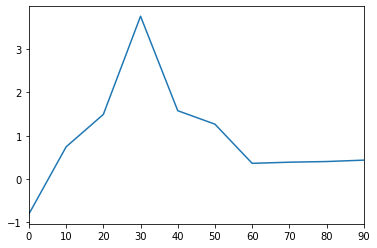

In [40]:
%matplotlib inline
s.plot()  #自动将series的index做横轴，value做纵轴

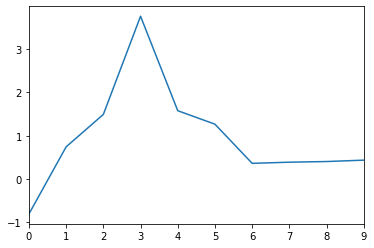

In [41]:
#series对象的索引会被传给matplotlib，并用以绘制x轴.也可以禁用该功能
s.plot(use_index=False) 

In [42]:
#dataframe的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

In [43]:
df

,A,B,C,D
0,0.033470,-0.869263,1.211443,0.829464
10,-0.351258,-2.047465,1.489549,0.067418
20,-1.749204,-0.456741,0.832147,0.429499
30,-2.589754,-2.085095,1.275705,0.909143
40,-2.193580,-2.042802,1.634714,2.586335
50,-1.859151,-2.301164,0.633624,4.628930
60,-3.435837,-3.391161,0.711695,6.678327
70,-3.346617,-3.953344,0.067264,8.207366
80,-3.465128,-4.310376,-1.313067,8.186520
90,-2.780994,-2.716696,0.385716,10.031511


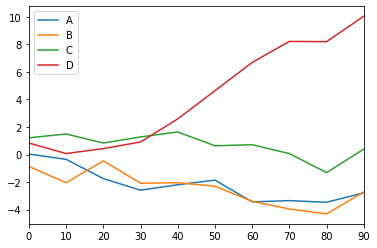

In [44]:
df.plot()

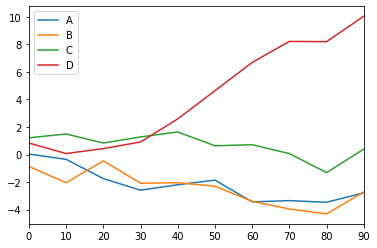

In [45]:
df.plot.line()   #df的plot属性的line方法

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b669c10>,
      dtype=object)

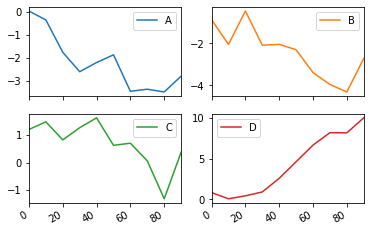

In [49]:
#要将dataframe的各列绘制在一个subplot中（如上），还是画在不同的subplot中
df.plot(subplots=True,layout=(2,2))

### Bar Plot

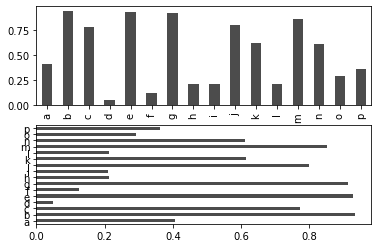

In [76]:
#plot.bar()和plot.barh()分别绘制水平和垂直的柱状图
%matplotlib inline
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
fig,axes = plt.subplots(2,1)
#series和dataframe的索引会被用作x轴（bar）或y轴(barh)
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

In [77]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.309695,0.535272,0.074087,0.991997
two,0.736400,0.841873,0.150528,0.056775
three,0.835297,0.194635,0.350189,0.265896
four,0.685815,0.276550,0.241593,0.178684
five,0.690160,0.003130,0.968253,0.177649
six,0.911692,0.194764,0.521136,0.504094


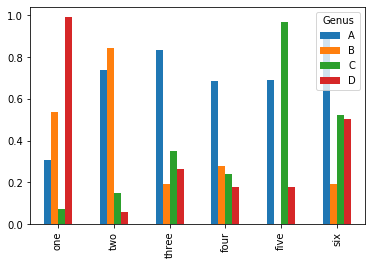

In [78]:
#对于dataframe而言，柱状图会将每一行的值分为一组
#dataframe各列的名称Genus被用作图例的标题
df.plot.bar()

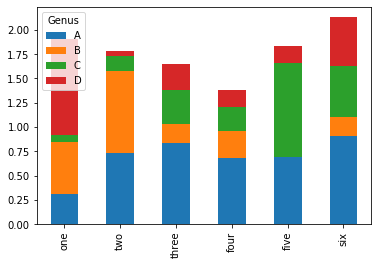

In [79]:
#df.plot.bar(stacked=True)设置堆积的柱状图
df.plot.bar(stacked=True)

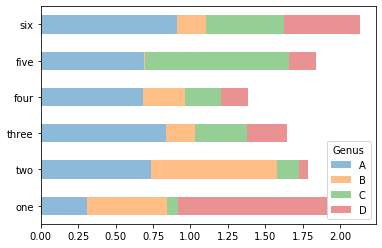

In [80]:
df.plot.barh(stacked=True,alpha=0.5)

In [95]:
#用柱状图显示series中各值出现的频率
tips = pd.read_csv('examples/tips.csv')
#crosstab交叉表，按类别分组，统计各个分组中的频数
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [96]:
party_counts = party_counts.loc[:,2:5]  #字符串标签含首尾

In [97]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [99]:
#进行规格化，事各行的和为1，并生成图表
#div()除法
party_counts.sum(1)
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [100]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


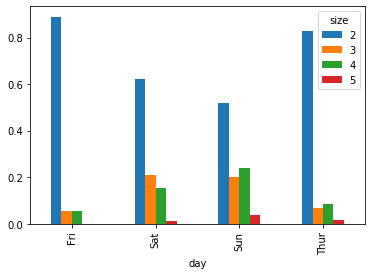

In [101]:
party_pcts.plot.bar()

In [107]:
#在绘制一个图形前，需要合计的数据，使用seaborn可以减少工作量

In [108]:
import seaborn as sns

In [109]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


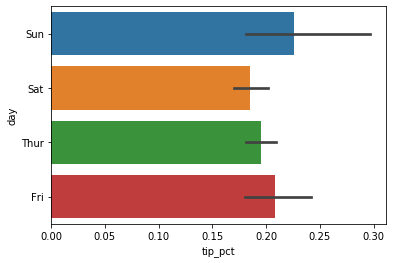

In [116]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
#orient='h' 水平  'v'垂直
#柱状图的值是tip_pct的平均值，柱状图的黑线代表95%的执行区间

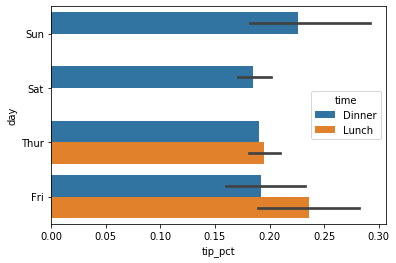

In [118]:
#sns.barplot()有颜色选项
#hue：颜色
#从结果中可以看出sun，sat中没有lunch
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [119]:
sns.set(style='whitegrid')   #设置白色网格

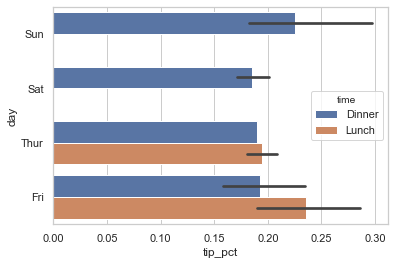

In [120]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and Density Plots

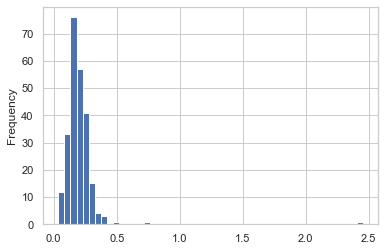

In [122]:
#histogram直方图
#直方图：将数据拆分到离散的、间隔均匀的面元中，绘制各个面元中数据点的数量
tips['tip_pct'].plot.hist(bins=50)

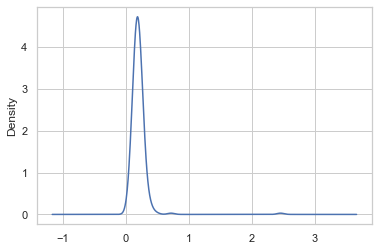

In [123]:
#与hist相关的一种密度图
#密度图也称为核密度（KDE,kernel density estimate）
tips['tip_pct'].plot.density()  #生成密度函数

In [124]:
#seaborn的distplot方法绘制直方图和密度图更加简单,可以同时画出直方图和密度图
#考虑一个双峰分布，由两个不同的标准正太分布组成
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))

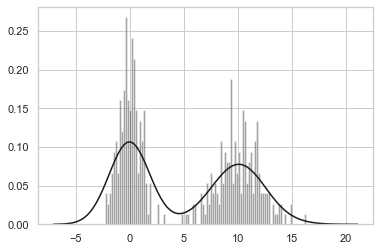

In [127]:
sns.distplot(values,bins=100,color='k')

### Scatter or Point Plots

In [139]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]

In [136]:
trans_data = np.log(data).diff().dropna()

In [137]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

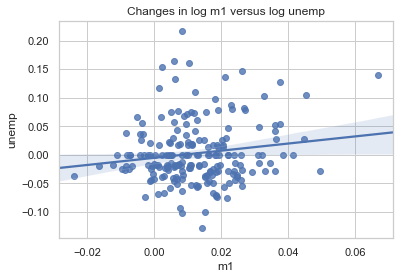

In [142]:
#使用seaborn的regplot方法做一个散布图，并加一条线性回归线
sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

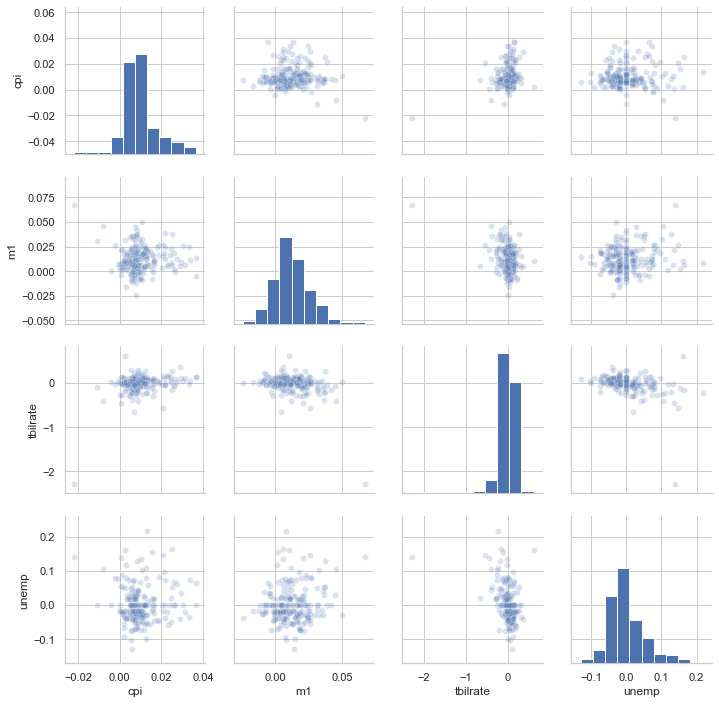

In [144]:
#在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为
#散布图矩阵（scatter plot matrix）
#seaborn可以通过pairplot函数，支持在对角线上防止每个变量的直方图或密度图

sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha': 0.2})
#diag_kind='hist'
#diag_kind:对角线的类型是密度图（kde）
#plot_kws：关键字参数传递配置选项到非对角线元素的图像上

### Facet Grids and Categorical Data

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


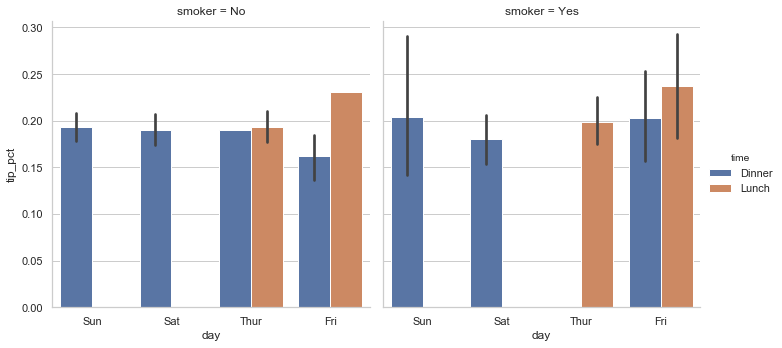

In [145]:
#小面网格
#有多个分类变量的数据可视化的一种方法是使用小面网格
#这里分类变量是smoker
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [146]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


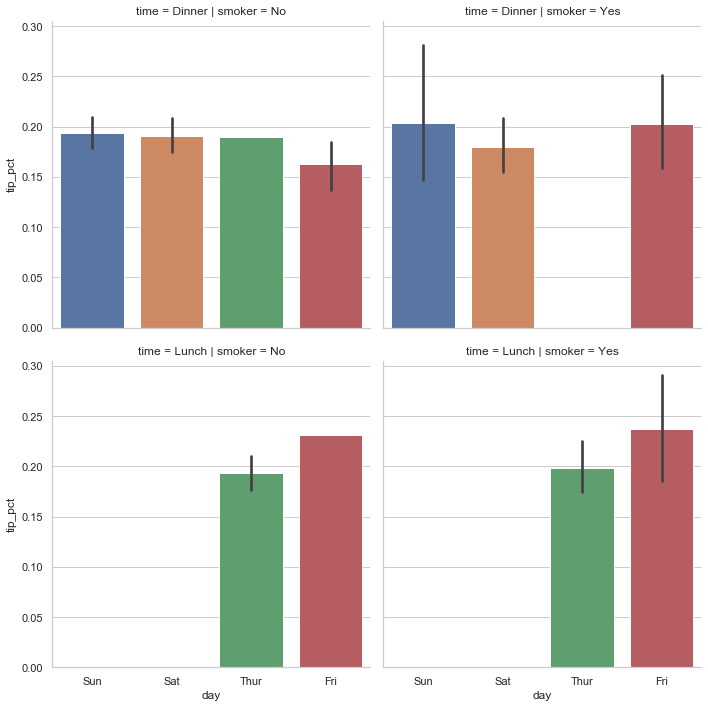

In [147]:
#除了在每个分面中使用不同颜色按时间分组，还可以通过给每个时间值添加一行来拓展分面网格
#相当于有两个分类变量，一个是time,一个是smoker
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

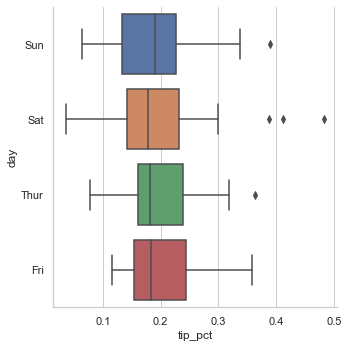

In [148]:
#sns.factorplot还支持其他绘图类型，例如盒图（它可以显示中位数，四分位数，异常值等）
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

In [149]:
#使用更为通用的seaborn.FacetGrid类，你可以创建自己的分面网格

In [ ]:
#创建动态交互图可以使用Boken库,Plotly库